# Example #1 IMDB: Chapter 3

Example from chapter 3 for binary classification.


In [1]:
from keras.datasets import imdb
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import optimizers

import matplotlib.pyplot as plt

from IPython.display import display, HTML

Using TensorFlow backend.


## Load Data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Examine Some Samples

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def get_word(i):
    # Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are
    # reserved indices for “padding,” “start of sequence,” and “unknown.”
    return reverse_word_index.get(i-3, '?')

def get_text(word_ids):
    return " ".join(get_word(wid) for wid in word_ids)

In [5]:
for i in range(0, 5):
    id = np.random.randint(0, len(train_data))
    text = get_text(train_data[id])

    display(HTML(f"<h2>ID: {id}</h2>"))
    display(HTML(f"Disposition: {train_labels[id]}"))
    display(HTML(f"<textarea rows='10' cols='100'>{text}</textarea>"))

In [6]:
# Show distribution of values.
pd.Series(y_train).value_counts().to_frame().rename(columns={0:'Count'})

,Count
0.0,12500
1.0,12500


## Train Model

In [7]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    
    return model

def plot_training(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.gca().grid()
    plt.show()

    acc = history_dict['acc']
    val_acc = history_dict['val_acc']
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.gca().grid()
    plt.show()

Train on 18750 samples, validate on 6250 samples
Epoch 1/8
18750/18750 [==============================] - 6s 304us/step - loss: 0.4115 - acc: 0.8340 - val_loss: 0.2923 - val_acc: 0.8902
Epoch 2/8
18750/18750 [==============================] - 4s 218us/step - loss: 0.2296 - acc: 0.9169 - val_loss: 0.2721 - val_acc: 0.8909
Epoch 3/8
18750/18750 [==============================] - 4s 213us/step - loss: 0.1735 - acc: 0.9379 - val_loss: 0.2820 - val_acc: 0.8893
Epoch 4/8
18750/18750 [==============================] - 4s 211us/step - loss: 0.1408 - acc: 0.9510 - val_loss: 0.2954 - val_acc: 0.8872
Epoch 5/8
18750/18750 [==============================] - 4s 212us/step - loss: 0.1154 - acc: 0.9585 - val_loss: 0.3865 - val_acc: 0.8717
Epoch 6/8
18750/18750 [==============================] - 4s 212us/step - loss: 0.0957 - acc: 0.9682 - val_loss: 0.3594 - val_acc: 0.8798
Epoch 7/8
18750/18750 [==============================] - 4s 211us/step - loss: 0.0766 - acc: 0.9750 - val_loss: 0.3979 - val_acc:

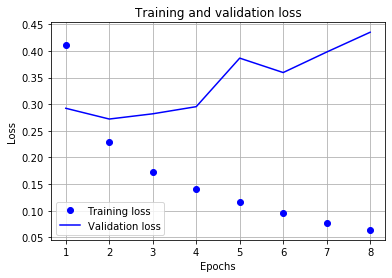

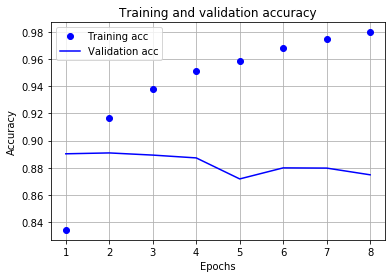

In [8]:
# Train the model with validation first to help figure out how many epochs to use.
model = create_model()
history = model.fit(
    x_train,
    y_train,
    validation_split = 0.25,
    epochs=8,
    batch_size=256
)

plot_training(history)

In [9]:
# Train the model with all test data
model = create_model()
history = model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=256
)

Epoch 1/4
25000/25000 [==============================] - 4s 171us/step - loss: 0.3852 - acc: 0.8473
Epoch 2/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.2213 - acc: 0.9179
Epoch 3/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.1746 - acc: 0.9356
Epoch 4/4
25000/25000 [==============================] - 4s 165us/step - loss: 0.1456 - acc: 0.9459


In [10]:
# Show the overall accuracy
results = model.evaluate(x_test, y_test)
results

25000/25000 [==============================] - 6s 223us/step


[0.3416040188217163, 0.8732799887657166]

## Examine Results

In [11]:
results = model.predict(x_test)

In [12]:
results_df = pd.DataFrame()
results_df['Predicted'] = [r[0] for r in results]
results_df['Actual'] = y_test
results_df['PredictionDiff'] = (results_df.Predicted - results_df.Actual).abs()
results_df['Text'] = [get_text(ids) for ids in test_data]

In [13]:
def render_row(id, row):
    html = ""
    html += f"ID: {id}<br/>"
    html += f"Predicted: {row.Predicted}<br/>"
    html += f"Actual: {row.Actual}<br/>"
    html += f"<textarea rows='10' cols='100'>{row.Text}</textarea>"
    return html

display(HTML("<h2>Good Review Predictions</h2>"))
for id, row in results_df[results_df.Predicted >= 0.85].sample(2).iterrows():
    display(HTML(render_row(id, row)))
    
display(HTML("<h2>Bad Review Predictions</h2>"))
for id, row in results_df[results_df.Predicted <= 0.15].sample(2).iterrows():
    display(HTML(render_row(id, row)))
    
display(HTML("<h2>Misclassified Reviews</h2>"))
for id, row in results_df[results_df.PredictionDiff >= 0.5].sample(2).iterrows():
    display(HTML(render_row(id, row)))